### 01 단어 표현

- 단어 임베딩 방법
    - 원-핫 인코딩 : 각 단어 벡터의 크기가 너무 커서 공간을 많이 차지하고, 큰 공간에 비해 실제 사용되는 값은 1이기 때문에 매우 비효율적이다. (희소행렬)
    - 분포 가설 : 같은 문맥의 단어, 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다.

- 분포 가설
    1. 카운트 기반 방법
    2. 신경망 등을 통해 문맥 안의 단어들을 예측하는 방법

#### 카운트 기반 방법
- 특잇값 분해(SVD)
- 잠재의미분석(LSA)
- Hyperspace Analogue to Language(HAL)
- Hellinger PCA

#### 예측 방법
- Word2Vec
    - CBOW : 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법. 주변 단어 입력으로 **중심 단어**를 예측
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdhTQ0m%2FbtrzfvszlX4%2F17qiQyaxQOb2Rxil3tFdLK%2Fimg.png" width=60%, height=60%>
    - Skip-gram : 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법. 중심 단어를 입력으로 **주변 단어**를 예측
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdkXNMB%2FbtrziwEVjNX%2FoGN75xeTOQcUMPSsmPrxzK%2Fimg.png" width=50%, height=50%>
- NNLM(Neural Network Language Model)
- RNNLM(Recurrent Neural Network Language Model)
- Word2Vec의 장점
    1. 단어 간의 유사도를 잘 측정
    2. 단어들의 복잡한 특징까지도 잘 잡아낸다.

### 02 텍스트 분류
#### 스팸 분류
#### 감정 분류
#### 뉴스 기사 분류
#### 지도 학습을 통한 텍스트 분류
- 나이브 베이즈
- SVM
- 신경망
- 선형 분류

#### 비지도 학습을 통한 텍스트 분류
- K-평균 군집화
- 계층적 군집화

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식이 있습니다.",
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)  # 문장 벡터화 실행

idf = tfidf_vectorizer.idf_
print(dict( zip( tfidf_vectorizer.get_feature_names(), idf ) ))  # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식이': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


#### 자카드 유사도
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMjJfMjQw/MDAxNTg0ODU0NTMwMTQ3.T67rTXyHgFh5cYZJwBcZavNviJp3kWZOhpp352mCAfog.XtOIFODZFt8mDBgK7TPfwGQS9iFnbURI6RNGYIvAVxgg.PNG.sjc02183/image.png?type=w800">

- 벡터화 없이 바로 유사도 측정이 가능

In [3]:
print(sent[0].split())
print(sent[1].split())

['휴일', '인', '오늘', '도', '서쪽', '을', '중심', '으로', '폭염', '이', '이어졌는데요,', '내일', '은', '반가운', '비', '소식이', '있습니다.']
['폭염', '을', '피해서', '휴일', '에', '놀러왔다가', '갑작스런', '비', '로', '인해', '망연자실', '하고', '있습니다.']


In [4]:
def jaccard_similarity(sentence1, sentence2):
    sent_union = set(sentence1.split()).union(set(sentence2.split()))  # 합집합
    sent_intersection = set(sentence1.split()).intersection(set(sentence2.split()))  # 교집합
    sent_jaccard = len(sent_intersection) / len(sent_union)
    return sent_jaccard

print("자카드 계수 : {:.2f}".format(jaccard_similarity(sent[0], sent[1])))

자카드 계수 : 0.20


#### 코사인 유사도
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0pBN5%2FbtqBW1nWMbL%2FE4Hh4JpyOqT3Opg4MhPa70%2Fimg.png">

- -1과 1 사이의 값을 가지고 1에 가까울수록 유사하다.

In [5]:
print(tfidf_matrix[0:1])
print(tfidf_matrix[1:2])

  (0, 11)	0.23061650387901597
  (0, 6)	0.3241234495558481
  (0, 4)	0.3241234495558481
  (0, 1)	0.3241234495558481
  (0, 9)	0.3241234495558481
  (0, 13)	0.23061650387901597
  (0, 8)	0.3241234495558481
  (0, 12)	0.3241234495558481
  (0, 5)	0.3241234495558481
  (0, 7)	0.3241234495558481
  (0, 16)	0.23061650387901597
  (0, 15)	0.36469322896147516
  (0, 3)	0.36469322896147516
  (0, 10)	0.36469322896147516
  (0, 0)	0.36469322896147516
  (0, 2)	0.36469322896147516
  (0, 14)	0.36469322896147516
  (0, 11)	0.2594822360637418
  (0, 13)	0.2594822360637418
  (0, 16)	0.2594822360637418


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])  # 첫 번째 문장과 두 번째 문장 비교

array([[0.17952266]])

#### 유클리디안 유사도(L2-Distance)
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMjJfNyAg/MDAxNTg0ODU1ODA3Mzg2.N4iGMh_23L43ZJp44Er9fcVxwHutQyaN1ogIBOjpvgIg.WlDX_QRkXd8L-1x5nX5DvevbugyOn-VGLNV_P23MB7cg.PNG.sjc02183/image.png?type=w800">

In [7]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

In [8]:
# L1 정규화

import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

#### 맨하튼 유사도(L1-Distance)
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHe3CB%2FbtqzYaaHmyR%2FeH3kYuU9e5HPkCzdJoodI0%2Fimg.png" width="30%" height="30%">

In [9]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

### 06 데이터 이해하기

In [13]:
import os
import re
import pandas as pd
import tensorflow as tf
#from tensorflow import keras.utils import get_file
from tensorflow.keras.utils import get_file

data_set = get_file(fname="imdb.tar.gz",
                    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                    extract=True)

84131840/84125825 [==============================] - 96s 1us/step


In [16]:
# 파일에서 리뷰 텍스트를 불러오는 함수
def directory_data(directory):
    data = {}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding="utf-8") as file:
            data['review'].append(file.read())

    return pd.DataFrame.from_dict(data)

# 각 리뷰에 해당하는 라벨값을 가져오는 함수
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0

    return pd.concat([pos_df, neg_df])

In [17]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [18]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [19]:
train_df.tail()

,review,sentiment
12495,"Towards the end of the movie, I felt it was to...",0
12496,This is the kind of movie that my enemies cont...,0
12497,I saw 'Descent' last night at the Stockholm Fi...,0
12498,Some films that you pick up for a pound turn o...,0
12499,"This is one of the dumbest films, I've ever se...",0


In [20]:
test_df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [21]:
test_df.tail()

,review,sentiment
12495,I occasionally let my kids watch this garbage ...,0
12496,When all we have anymore is pretty much realit...,0
12497,The basic genre is a thriller intercut with an...,0
12498,Four things intrigued me as to this film - fir...,0
12499,David Bryce's comments nearby are exceptionall...,0


In [22]:
reviews = list(train_df['review'])
print(reviews[:5])

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from

In [23]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [ r.split() for r in reviews ]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [ len(t) for t in tokenized_reviews ]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [ len(s.replace(' ', '')) for s in reviews ]

In [24]:
print(tokenized_reviews[:3], "\n")
print(review_len_by_token, "\n")
print(review_len_by_eumjeol)

[['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy.', 'It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"Teachers".', 'My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'Bromwell', "High's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"Teachers".', 'The', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students.', 'When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'I', 'immediately', 'recalled', '.........', 'at', '..........', 'High.', 'A', 'classic', 'line:', 'INSPECTOR:', "I'm", 'here', 'to', 'sack', 'one', 'of', 'your', '

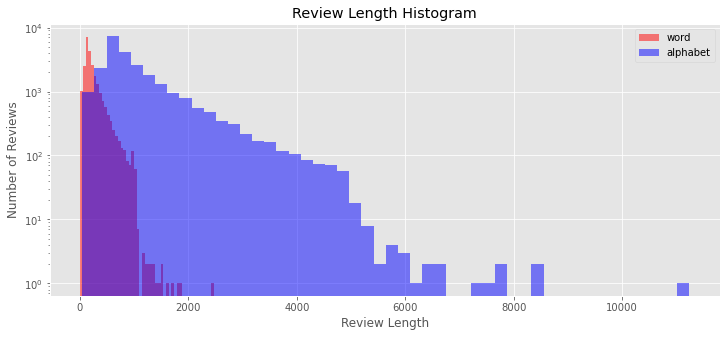

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.legend()
plt.show();

In [26]:
import numpy as np

print('문장 최대 길이 : {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이 : {}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차 : {}'.format(np.std(review_len_by_token)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token)))

print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.7872
문장 길이 표준편차 : 173.72955740506566
문장 중간 길이 : 174.0
제 1사분위 길이 : 127.0
제 3사분위 길이 : 284.0


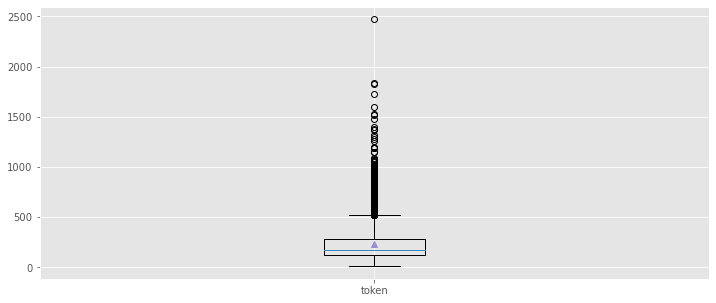

In [27]:
# 문장 내 단어 수
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token],
            labels = ['token'],
            showmeans=True)  # 평균값을 마크
plt.show();

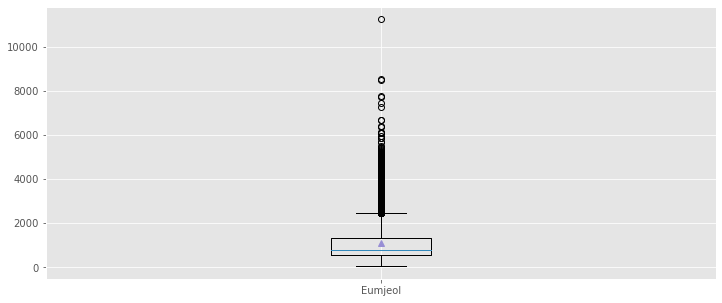

In [28]:
# 문장에 알파벳 개수
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
            labels = ['Eumjeol'],
            showmeans=True)  # 평균값을 마크
plt.show();

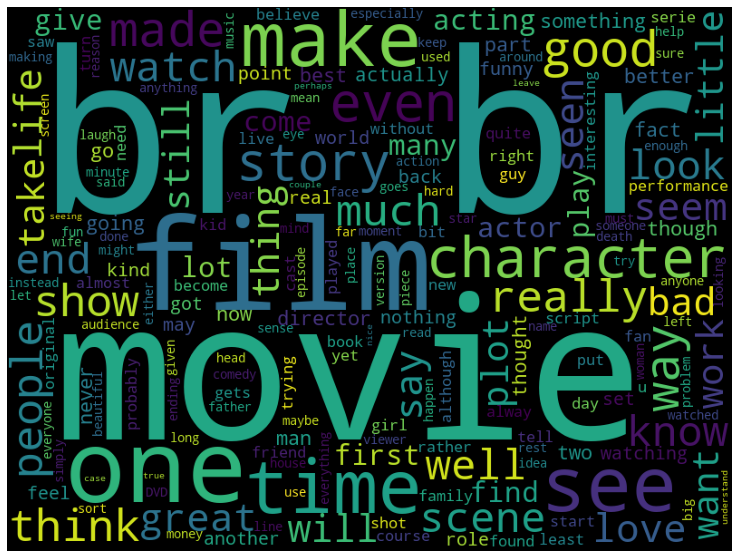

In [31]:
# 워드 클라우드
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color="black",
    width=800,
    height=600
).generate(" ".join(train_df['review']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

<AxesSubplot:xlabel='sentiment', ylabel='count'>

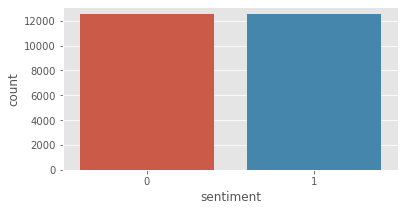

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df["sentiment"].value_counts()
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(x = train_df["sentiment"])